# tsai

In [2]:
# # **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI ****************
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null

In [3]:
from tsai.all import *
computer_setup()

os             : Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic
python         : 3.7.13
tsai           : 0.3.1
fastai         : 2.6.3
fastcore       : 1.4.4
torch          : 1.11.0+cu113
device         : 1 gpu (['Tesla P100-PCIE-16GB'])
cpu cores      : 4
RAM            : 25.46 GB
GPU memory     : [15.9] GB


# 데이터 불러오기

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train.csv')
test = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_test.csv')

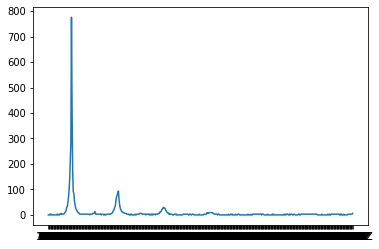

In [ ]:
import matplotlib.pyplot as plt
temp = train.drop('leaktype', axis=1)
plt.plot(temp.iloc[1])

In [ ]:
import collections
from collections import Counter
label_counts = collections.Counter(train['leaktype'])
print('Counts by label:', dict(label_counts))
print(f'Naive Accuracy: {100*max(label_counts.values())/sum(label_counts.values()):0.2f}%')

Counts by label: {'out': 1800, 'in': 1800, 'normal': 18000, 'other': 7000, 'noise': 5000}
Naive Accuracy: 53.57%


In [ ]:
# train 데이터 feature(X), target(y) 분리
X = train.drop('leaktype', axis=1)
y = train[['leaktype']]
display(X, y)

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,0,2,2,0,2,0,2,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,0,0,0,3,0,3,0,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,0,4,4,4,4,5,4,4,5,5,...,5,5,6,5,6,6,6,5,6,4
3,0,6,5,5,6,5,6,6,5,5,...,6,6,7,7,5,6,5,5,7,7
4,0,3,0,0,3,0,0,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,8,7,7,7,7,7,6,7,6,7
33596,0,3,3,3,2,3,3,3,3,7,...,3,5,5,5,5,3,3,3,3,3
33597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,3,0,0,3
33598,0,8,7,7,5,8,8,8,8,7,...,8,10,8,8,10,10,7,7,7,5


,leaktype
0,out
1,out
2,out
3,out
4,out
...,...
33595,noise
33596,noise
33597,noise
33598,noise


# ifft

In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_train.csv')
test = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_test.csv')

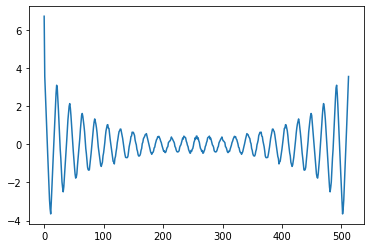

In [ ]:
X_tmp = train.drop('leaktype', axis=1)
X_tmp = np.array(X_tmp)

X_ifft = np.fft.ifft(X_tmp)
plt.plot(X_ifft[0])

In [ ]:
X_ifft = X_ifft.real
X_inv = pd.DataFrame(X_ifft)
X_inv

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,6.723197,3.561624,2.707740,1.884236,1.040136,0.273550,-0.565195,-1.338498,-2.145088,-2.909041,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,8.984405,4.455612,1.710846,0.260431,-1.066644,-2.600036,-5.509427,-6.165960,-2.970326,-1.199653,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,10.327485,4.314191,2.326266,0.057115,-1.711270,-2.929355,-3.218105,-2.751953,-1.770634,-0.669577,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,13.265107,-6.220146,7.132651,-5.354133,3.995386,-3.844817,1.891802,-2.430595,1.217212,-1.460584,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,7.970760,4.547614,3.275575,1.975863,0.880931,-0.100297,-0.992489,-2.125377,-3.315900,-4.370681,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,11.456140,4.364622,3.015975,0.845496,-0.802755,-2.413019,-3.351347,-3.285370,-2.643613,-1.247795,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,6.791423,2.904051,2.020523,1.163582,0.479128,-0.248143,-0.910141,-1.697930,-2.385597,-2.885061,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,5.218324,3.850286,2.796113,1.665603,0.694871,-0.223927,-1.072028,-2.113923,-2.939710,-3.969320,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,30.489279,-18.730260,14.031722,-11.676628,9.713875,-8.516330,7.257637,-6.497012,5.620159,-4.982636,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


In [ ]:
concat_df = pd.concat([train, X_inv], axis=1)
#concat_df.to_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv') # 나중에 이 파일 불러와서 X, y만 나눠서 쓰기
concat_X = concat_df.drop('leaktype', axis=1)
concat_y = concat_df[['leaktype']]
display(concat_X, concat_y)

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,503,504,505,506,507,508,509,510,511,512
0,0,2,2,0,2,0,2,2,2,2,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,0,0,0,3,0,3,0,0,0,0,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,0,4,4,4,4,5,4,4,5,5,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,0,6,5,5,6,5,6,6,5,5,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,0,3,0,0,3,0,0,3,3,3,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,0,3,3,3,2,3,3,3,3,7,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,0,0,0,0,0,0,0,0,0,0,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,0,8,7,7,5,8,8,8,8,7,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


,leaktype
0,out
1,out
2,out
3,out
4,out
...,...
33595,noise
33596,noise
33597,noise
33598,noise


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# normalization

In [ ]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성
X, y = norm_X, y
model_name = ''
method_num = ''
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

In [ ]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,503,504,505,506,507,508,509,510,511,512
0,out,0,2,2,0,2,0,2,2,2,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,out,0,0,0,3,0,3,0,0,0,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,out,0,4,4,4,4,5,4,4,5,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,out,0,6,5,5,6,5,6,6,5,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,out,0,3,0,0,3,0,0,3,3,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,noise,0,5,6,6,23,15,7,10,15,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,noise,0,3,3,3,2,3,3,3,3,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,noise,0,0,0,0,0,0,0,0,0,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,noise,0,8,7,7,5,8,8,8,8,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


## 방법1
- before: ifft 하기 전 원본 데이터
- after: ifft 한 후의 데이터

- before를 MinMaxScaler(feature_range = (after의 최소값, after의 최대값))로 정규화, after는 그대로 하여 training

In [4]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat

,leaktype,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,...,503,504,505,506,507,508,509,510,511,512
0,out,0,2,2,0,2,0,2,2,2,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,out,0,0,0,3,0,3,0,0,0,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,out,0,4,4,4,4,5,4,4,5,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,out,0,6,5,5,6,5,6,6,5,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,out,0,3,0,0,3,0,0,3,3,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,noise,0,5,6,6,23,15,7,10,15,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,noise,0,3,3,3,2,3,3,3,3,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,noise,0,0,0,0,0,0,0,0,0,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,noise,0,8,7,7,5,8,8,8,8,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


In [5]:
before = concat.iloc[:, :514].drop('leaktype', axis=1)
after = concat.iloc[:, 514:]
display(before.head(), after.head())

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,5030HZ,5040HZ,5050HZ,5060HZ,5070HZ,5080HZ,5090HZ,5100HZ,5110HZ,5120HZ
0,0,2,2,0,2,0,2,2,2,2,...,2,5,2,2,5,2,2,5,2,5
1,0,0,0,3,0,3,0,0,0,0,...,0,3,3,3,3,3,3,3,3,6
2,0,4,4,4,4,5,4,4,5,5,...,5,5,6,5,6,6,6,5,6,4
3,0,6,5,5,6,5,6,6,5,5,...,6,6,7,7,5,6,5,5,7,7
4,0,3,0,0,3,0,0,3,3,3,...,3,3,3,3,3,3,3,3,3,3


,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,6.723197,3.561624,2.707740,1.884236,1.040136,0.273550,-0.565195,-1.338498,-2.145088,-2.909041,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,8.984405,4.455612,1.710846,0.260431,-1.066644,-2.600036,-5.509427,-6.165960,-2.970326,-1.199653,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,10.327485,4.314191,2.326266,0.057115,-1.711270,-2.929355,-3.218105,-2.751953,-1.770634,-0.669577,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,13.265107,-6.220146,7.132651,-5.354133,3.995386,-3.844817,1.891802,-2.430595,1.217212,-1.460584,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,7.970760,4.547614,3.275575,1.975863,0.880931,-0.100297,-0.992489,-2.125377,-3.315900,-4.370681,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614


In [6]:
min_a = after.describe().loc['min'].min()
max_a = after.describe().loc['max'].max()

min_b = before.describe().loc['min'].min()
max_b = before.describe().loc['max'].max()

print(f'min_a:{min_a}, max_a:{max_a}\nmin_b:{min_b}, max_b:{max_b}')

min_a:-19.611872254623528, max_a:51.01559454191033
min_b:0.0, max_b:1623.0


In [8]:
# reshape(1, -1)한 상태로 scaling
before = np.array(before)
b_1d = before.reshape(1, -1)
b_1d.shape

(1, 17236800)

In [11]:
before.shape

(33600, 513)

In [ ]:
#b_array = np.array(before)
#b = b_array.T

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(min_a, max_a))

In [10]:
scaler = scaler.fit(b_1d.T)
normalized_b = scaler.transform(b_1d.T).T
normalized_b 

array([[-19.61187225, -19.52483902, -19.52483902, ..., -19.48132241,
        -19.48132241, -19.48132241]])

In [12]:
norm_b = normalized_b.reshape((33600, 513))
norm_b

array([[-19.61187225, -19.52483902, -19.52483902, ..., -19.39428918,
        -19.52483902, -19.39428918],
       [-19.61187225, -19.61187225, -19.61187225, ..., -19.48132241,
        -19.48132241, -19.35077256],
       [-19.61187225, -19.43780579, -19.43780579, ..., -19.39428918,
        -19.35077256, -19.43780579],
       ...,
       [-19.61187225, -19.61187225, -19.61187225, ..., -19.61187225,
        -19.61187225, -19.48132241],
       [-19.61187225, -19.26373933, -19.30725595, ..., -19.30725595,
        -19.30725595, -19.39428918],
       [-19.61187225, -19.61187225, -19.48132241, ..., -19.48132241,
        -19.48132241, -19.48132241]])

In [13]:
df = pd.DataFrame(norm_b)
df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,-19.611872,-19.524839,-19.524839,-19.611872,-19.524839,-19.611872,-19.524839,-19.524839,-19.524839,-19.524839,...,-19.524839,-19.394289,-19.524839,-19.524839,-19.394289,-19.524839,-19.524839,-19.394289,-19.524839,-19.394289
1,-19.611872,-19.611872,-19.611872,-19.481322,-19.611872,-19.481322,-19.611872,-19.611872,-19.611872,-19.611872,...,-19.611872,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322,-19.350773
2,-19.611872,-19.437806,-19.437806,-19.437806,-19.437806,-19.394289,-19.437806,-19.437806,-19.394289,-19.394289,...,-19.394289,-19.394289,-19.350773,-19.394289,-19.350773,-19.350773,-19.350773,-19.394289,-19.350773,-19.437806
3,-19.611872,-19.350773,-19.394289,-19.394289,-19.350773,-19.394289,-19.350773,-19.350773,-19.394289,-19.394289,...,-19.350773,-19.350773,-19.307256,-19.307256,-19.394289,-19.350773,-19.394289,-19.394289,-19.307256,-19.307256
4,-19.611872,-19.481322,-19.611872,-19.611872,-19.481322,-19.611872,-19.611872,-19.481322,-19.481322,-19.481322,...,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,-19.611872,-19.394289,-19.350773,-19.350773,-18.610990,-18.959123,-19.307256,-19.176706,-18.959123,-18.915606,...,-19.263739,-19.307256,-19.307256,-19.307256,-19.307256,-19.307256,-19.350773,-19.307256,-19.350773,-19.307256
33596,-19.611872,-19.481322,-19.481322,-19.481322,-19.524839,-19.481322,-19.481322,-19.481322,-19.481322,-19.307256,...,-19.481322,-19.394289,-19.394289,-19.394289,-19.394289,-19.481322,-19.481322,-19.481322,-19.481322,-19.481322
33597,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,...,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.481322,-19.481322,-19.611872,-19.611872,-19.481322
33598,-19.611872,-19.263739,-19.307256,-19.307256,-19.394289,-19.263739,-19.263739,-19.263739,-19.263739,-19.307256,...,-19.263739,-19.176706,-19.263739,-19.263739,-19.176706,-19.176706,-19.307256,-19.307256,-19.307256,-19.394289


In [14]:
norm_df = pd.concat([df, after], axis=1)
norm_df

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,-19.611872,-19.524839,-19.524839,-19.611872,-19.524839,-19.611872,-19.524839,-19.524839,-19.524839,-19.524839,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,-19.611872,-19.611872,-19.611872,-19.481322,-19.611872,-19.481322,-19.611872,-19.611872,-19.611872,-19.611872,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,-19.611872,-19.437806,-19.437806,-19.437806,-19.437806,-19.394289,-19.437806,-19.437806,-19.394289,-19.394289,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,-19.611872,-19.350773,-19.394289,-19.394289,-19.350773,-19.394289,-19.350773,-19.350773,-19.394289,-19.394289,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,-19.611872,-19.481322,-19.611872,-19.611872,-19.481322,-19.611872,-19.611872,-19.481322,-19.481322,-19.481322,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,-19.611872,-19.394289,-19.350773,-19.350773,-18.610990,-18.959123,-19.307256,-19.176706,-18.959123,-18.915606,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,-19.611872,-19.481322,-19.481322,-19.481322,-19.524839,-19.481322,-19.481322,-19.481322,-19.481322,-19.307256,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,-19.611872,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,-19.611872,-19.263739,-19.307256,-19.307256,-19.394289,-19.263739,-19.263739,-19.263739,-19.263739,-19.307256,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


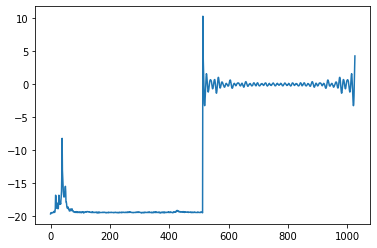

In [15]:
plt.plot(norm_df.iloc[2].values)

In [ ]:
norm_df.values

array([[-19.61187225, -19.36999737, -19.36999737, ...,   1.88423568,
          2.7077405 ,   3.56162407],
       [-19.61187225, -19.61187225, -19.61187225, ...,   0.26043101,
          1.71084554,   4.45561204],
       [-19.61187225, -18.53769025, -18.53769025, ...,   0.05711484,
          2.32626618,   4.31419071],
       ...,
       [-19.61187225, -19.61187225, -19.61187225, ...,   1.66560341,
          2.79611271,   3.85028636],
       [-19.61187225, -17.98825233, -18.19120482, ..., -11.67662783,
         14.03172194, -18.73025981],
       [-19.61187225, -19.61187225, -19.31260333, ...,   1.68290156,
          2.45449671,   3.14538889]])

In [16]:
norm_X = np.array(norm_df.values)
norm_X = to3d(norm_X) # 3-d array로 변경
norm_X.shape

(33600, 1, 1026)

In [17]:
y = concat[['leaktype']]
y = np.array(y.leaktype)
y

array(['out', 'out', 'out', ..., 'noise', 'noise', 'noise'], dtype=object)

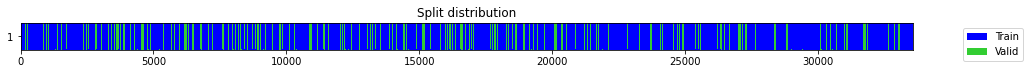

splits:([29564, 2979, 15031, 28403, 18712, 2393, 21632, 20906, 16421, 17183, 18999, 30706, 27651, 19312, 15863, 5399, 31046, 28292, 24227, 10671, 7918, 646, 22139, 21967, 8442, 11303, 9565, 15340, 4635, 22275, 6939, 23229, 23455, 24000, 19638, 14135, 13254, 9795, 6, 13622, 11266, 3040, 8676, 25819, 30544, 9007, 14816, 23871, 9060, 3373, 4847, 19957, 32181, 17375, 27558, 6428, 14346, 392, 7110, 26591, 10446, 18690, 22183, 25870, 15902, 27614, 2906, 5980, 27038, 31903, 7389, 9917, 22448, 10869, 14855, 22807, 31416, 3134, 20698, 17817, 20450, 32166, 22366, 22384, 4990, 24381, 13470, 17770, 10934, 33443, 32113, 30209, 27267, 131, 8881, 31667, 33243, 22062, 10875, 17834, 33275, 19685, 16502, 11697, 11004, 32363, 13368, 17468, 3482, 27176, 14546, 10879, 30625, 5500, 8740, 15622, 27710, 21314, 1186, 24156, 13608, 4128, 4143, 17166, 13556, 13507, 20870, 27092, 19003, 29785, 13749, 24856, 33202, 2902, 31772, 3959, 12835, 9303, 24389, 15123, 31329, 31796, 27997, 30448, 29713, 28441, 27585, 13396

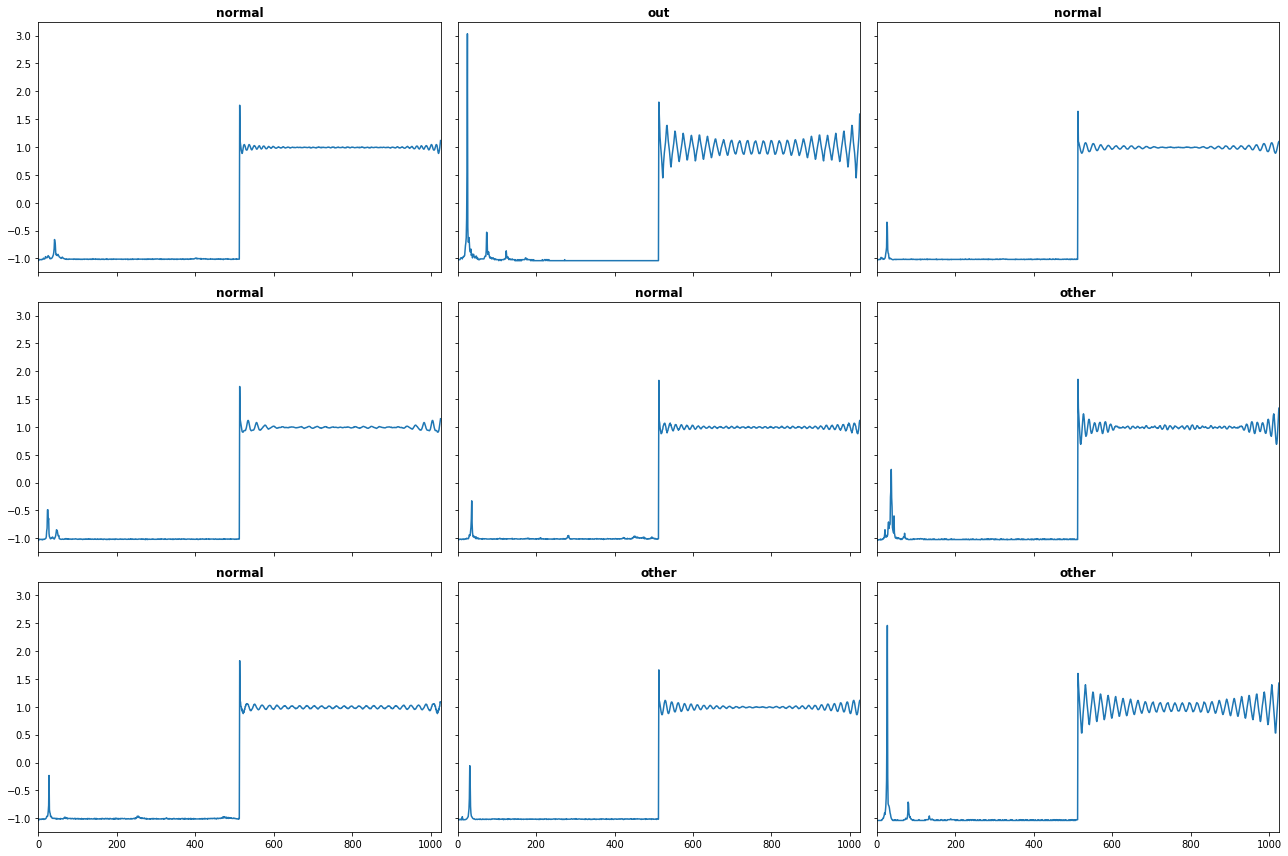

epoch,train_loss,valid_loss,accuracy,time
0,0.768776,6.095534,0.223810,00:28
1,0.753424,2.124506,0.209077,00:28
2,0.727670,5.862785,0.536012,00:28
3,0.703885,5.970695,0.543899,00:28
4,0.686221,2.933299,0.614137,00:28
5,0.659329,6.989587,0.210119,00:28
6,0.648106,12.159753,0.106101,00:28
7,0.631931,2.166716,0.652976,00:28
8,0.603461,0.621417,0.764137,00:28
9,0.592625,0.587312,0.767262,00:28


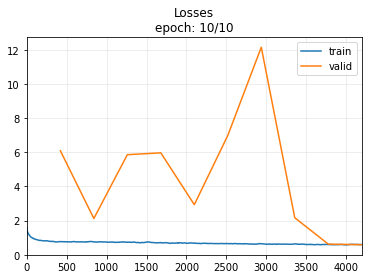

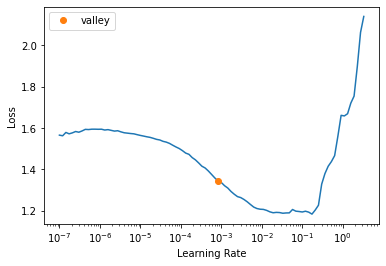

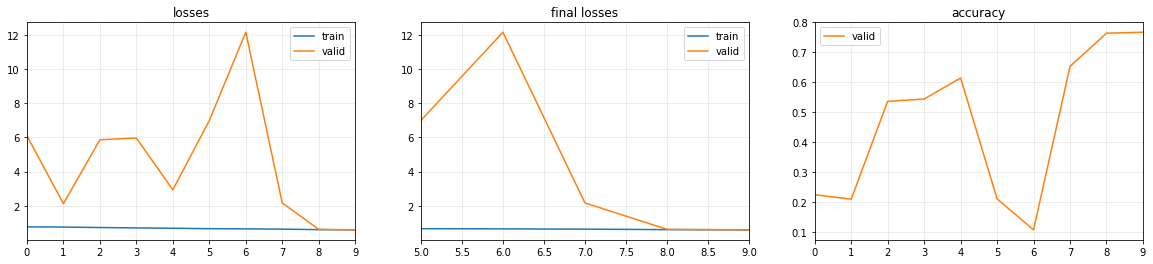

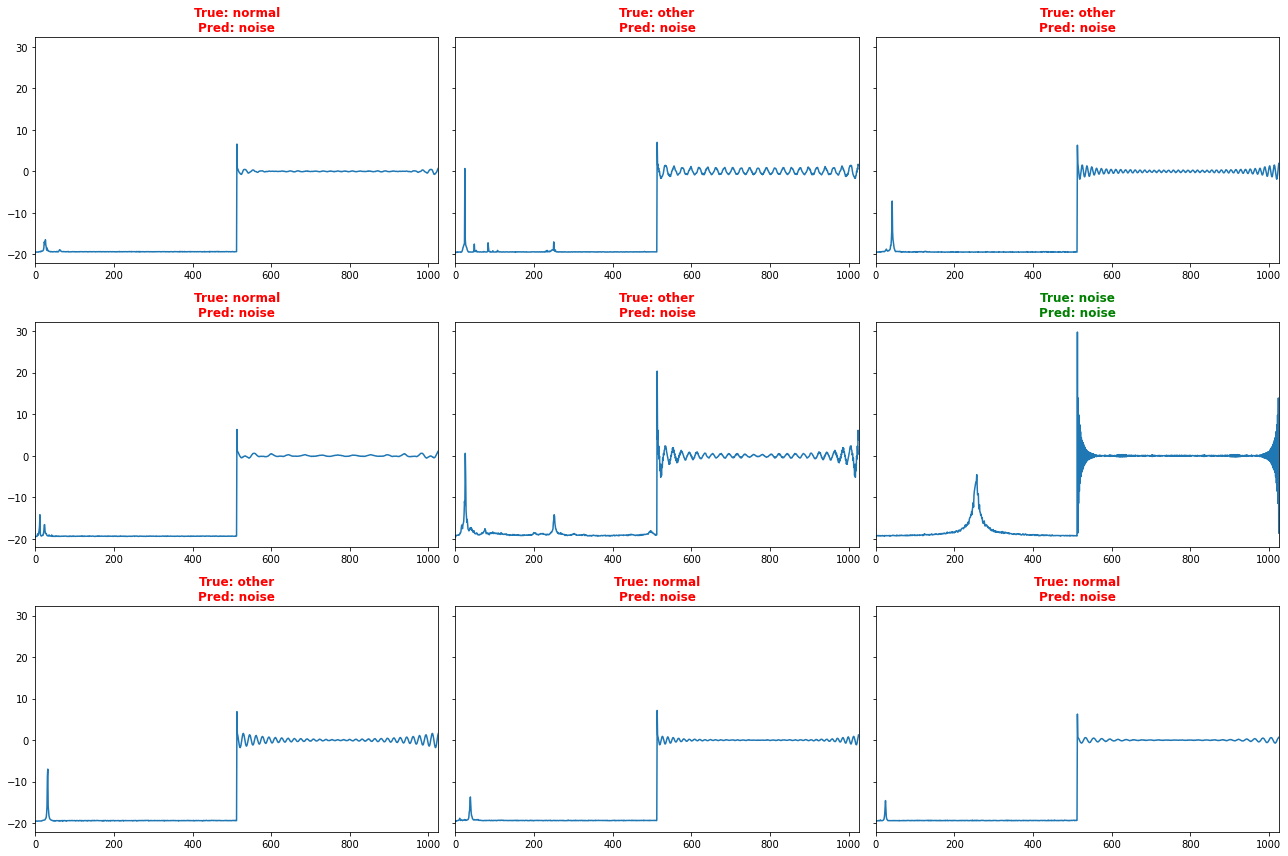

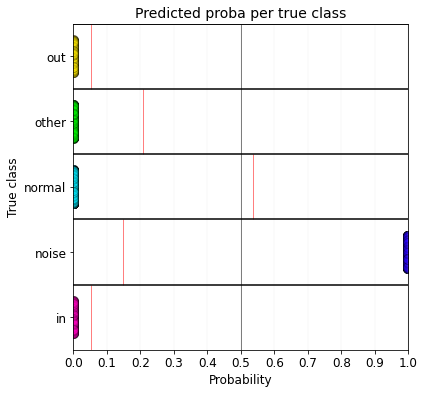

              precision    recall  f1-score   support

          in       0.00      0.00      0.00       360
       noise       0.15      1.00      0.26      1000
      normal       0.00      0.00      0.00      3600
       other       0.00      0.00      0.00      1400
         out       0.00      0.00      0.00       360

    accuracy                           0.15      6720
   macro avg       0.03      0.20      0.05      6720
weighted avg       0.02      0.15      0.04      6720



['normal' 'other' 'normal' 'normal' 'other' 'normal' 'other' 'normal'
 'normal' 'other']


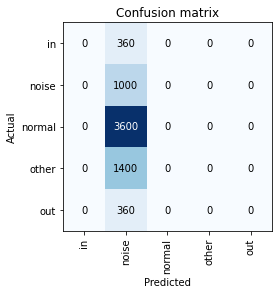

In [18]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성

#
X, y = norm_X, y
#
model_name = 'InceptionTimePlus'
method_num = '1'
#

splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

## 방법2
- before, after concat한 데이터 전체를 standardize

In [19]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat_X = concat.drop('leaktype', axis=1)
concat_y = np.array(concat[['leaktype']].leaktype) # y 완료
display(concat_X, concat_y)

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,503,504,505,506,507,508,509,510,511,512
0,0,2,2,0,2,0,2,2,2,2,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,0,0,0,3,0,3,0,0,0,0,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,0,4,4,4,4,5,4,4,5,5,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,0,6,5,5,6,5,6,6,5,5,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,0,3,0,0,3,0,0,3,3,3,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,0,3,3,3,2,3,3,3,3,7,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,0,0,0,0,0,0,0,0,0,0,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,0,8,7,7,5,8,8,8,8,7,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


array(['out', 'out', 'out', ..., 'noise', 'noise', 'noise'], dtype=object)

In [22]:
concat_X = np.array(concat_X)
concat_X = concat_X.reshape(1, -1)

In [23]:
concat_X.shape

(1, 34473600)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(concat_X.T) # 열 방향
normalized_X = scaler.transform(concat_X.T).T


In [30]:
norm_X = normalized_X.reshape((33600, 1026))
norm_X = to3d(norm_X)
norm_X.shape

(33600, 1, 1026)

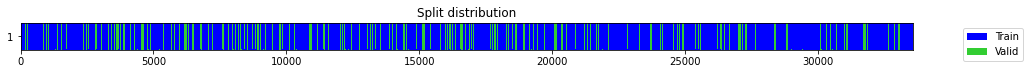

splits:([29564, 2979, 15031, 28403, 18712, 2393, 21632, 20906, 16421, 17183, 18999, 30706, 27651, 19312, 15863, 5399, 31046, 28292, 24227, 10671, 7918, 646, 22139, 21967, 8442, 11303, 9565, 15340, 4635, 22275, 6939, 23229, 23455, 24000, 19638, 14135, 13254, 9795, 6, 13622, 11266, 3040, 8676, 25819, 30544, 9007, 14816, 23871, 9060, 3373, 4847, 19957, 32181, 17375, 27558, 6428, 14346, 392, 7110, 26591, 10446, 18690, 22183, 25870, 15902, 27614, 2906, 5980, 27038, 31903, 7389, 9917, 22448, 10869, 14855, 22807, 31416, 3134, 20698, 17817, 20450, 32166, 22366, 22384, 4990, 24381, 13470, 17770, 10934, 33443, 32113, 30209, 27267, 131, 8881, 31667, 33243, 22062, 10875, 17834, 33275, 19685, 16502, 11697, 11004, 32363, 13368, 17468, 3482, 27176, 14546, 10879, 30625, 5500, 8740, 15622, 27710, 21314, 1186, 24156, 13608, 4128, 4143, 17166, 13556, 13507, 20870, 27092, 19003, 29785, 13749, 24856, 33202, 2902, 31772, 3959, 12835, 9303, 24389, 15123, 31329, 31796, 27997, 30448, 29713, 28441, 27585, 13396

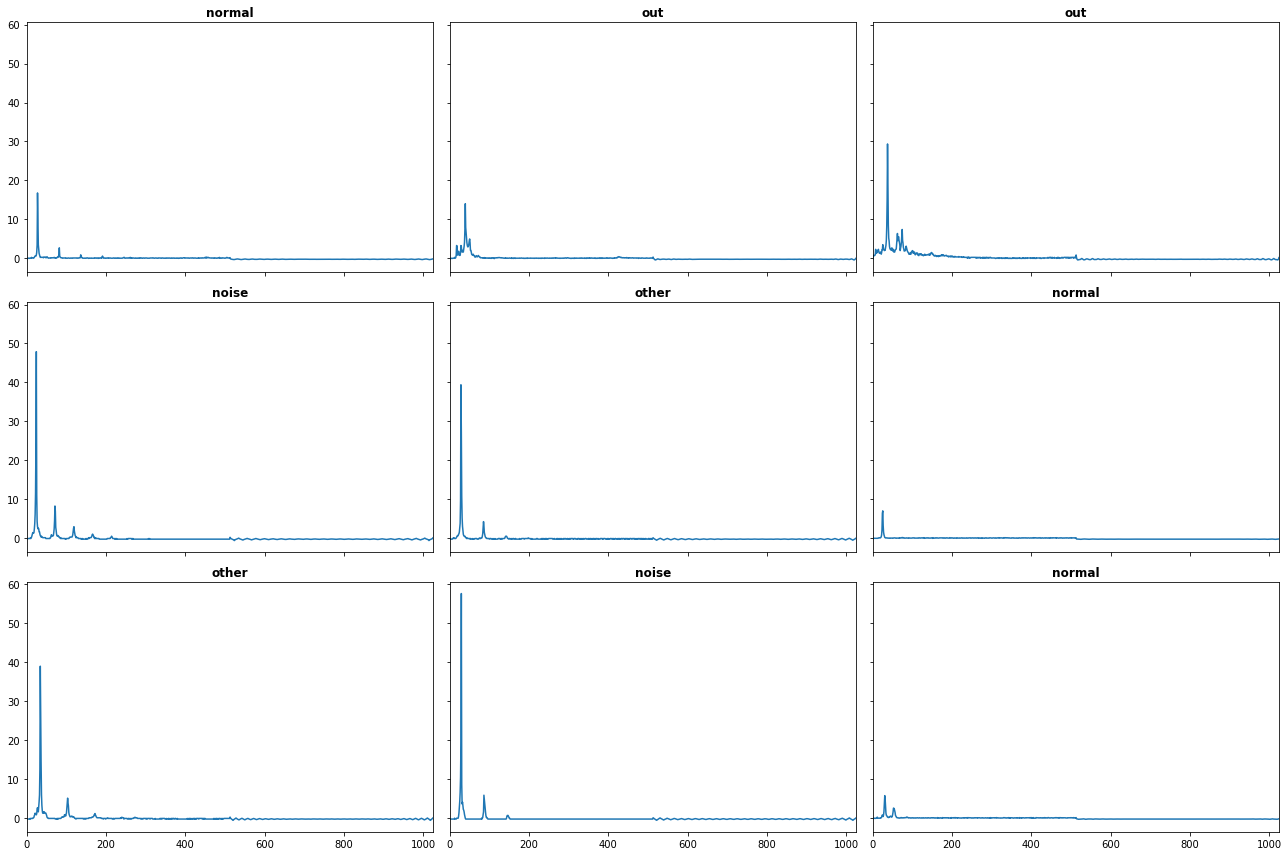

epoch,train_loss,valid_loss,accuracy,time
0,0.736815,0.719673,0.735863,00:28
1,0.678843,3.781570,0.190327,00:28
2,0.672904,0.845556,0.668601,00:28
3,0.646613,0.664437,0.741071,00:28
4,0.611019,0.627600,0.758333,00:28
5,0.603727,0.748564,0.749107,00:28
6,0.578148,1.105239,0.708036,00:28
7,0.546006,0.554847,0.801488,00:28
8,0.499124,0.509579,0.815923,00:28
9,0.493944,0.516623,0.815625,00:28


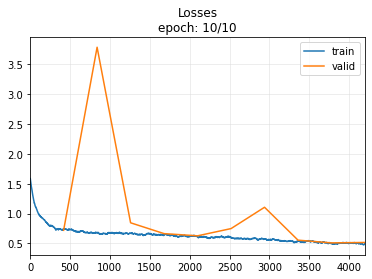

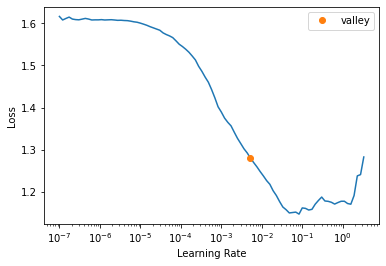

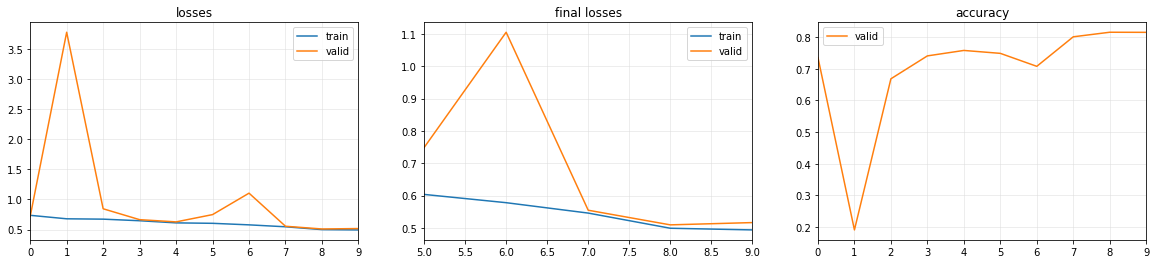

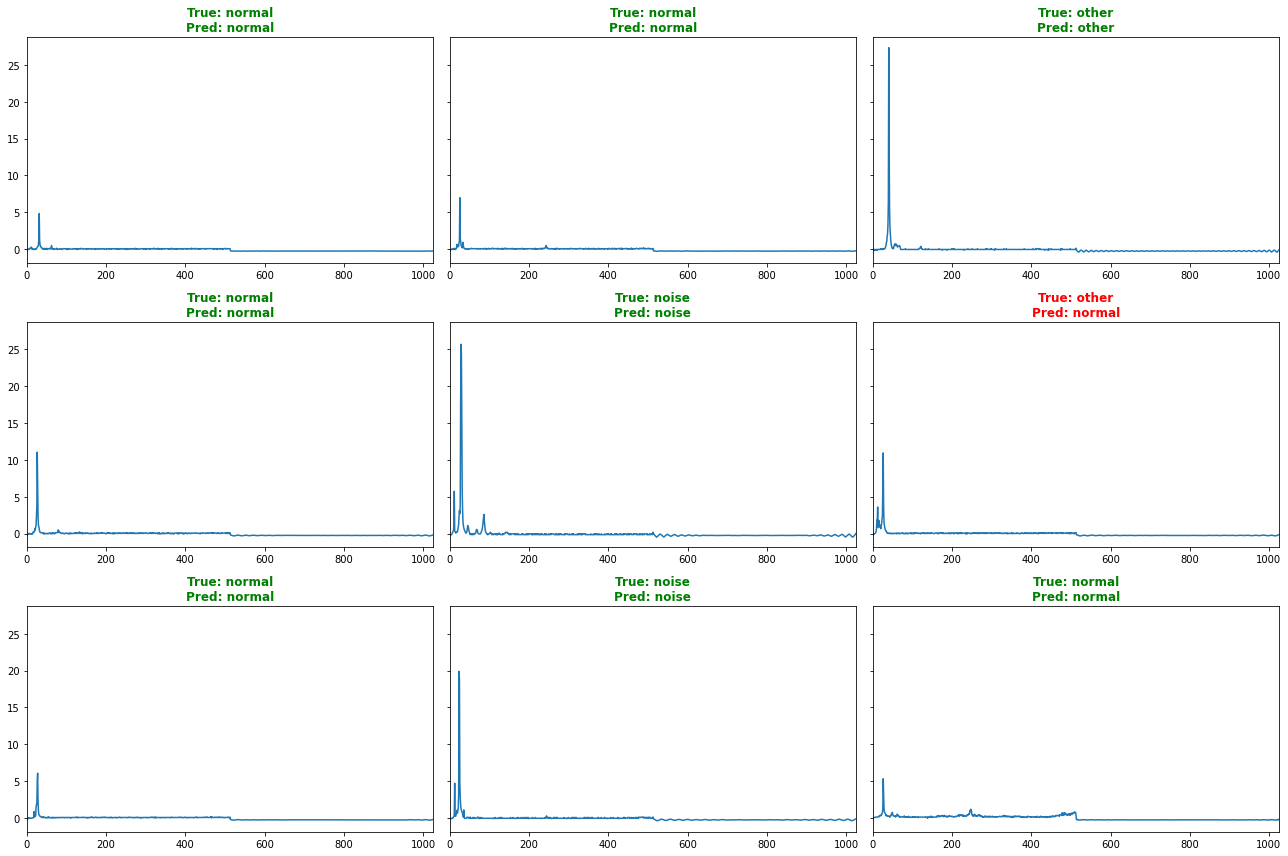

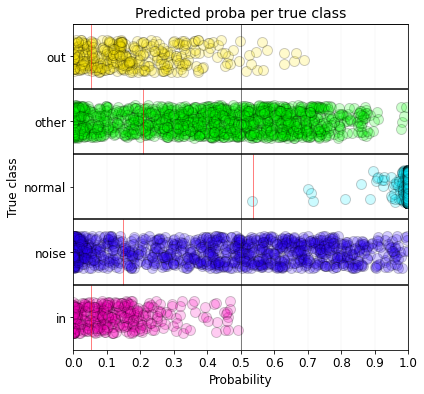

              precision    recall  f1-score   support

          in       0.41      0.05      0.09       360
       noise       0.71      0.55      0.62      1000
      normal       0.78      1.00      0.88      3600
       other       0.68      0.57      0.62      1400
         out       0.43      0.14      0.22       360

    accuracy                           0.75      6720
   macro avg       0.60      0.46      0.49      6720
weighted avg       0.71      0.75      0.71      6720



['normal' 'other' 'normal' 'normal' 'other' 'normal' 'other' 'normal'
 'normal' 'normal']


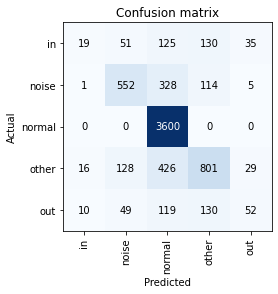

In [31]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성
#
X, y = norm_X, concat_y
#
model_name = 'InceptionTimePlus'
method_num = '2'
#
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

## 방법3
- before, after concat한 데이터 전체를 MinMaxScaling

In [32]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat_X = concat.drop('leaktype', axis=1)
concat_y = np.array(concat[['leaktype']].leaktype) # y 완료
display(concat_X, concat_y)

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,503,504,505,506,507,508,509,510,511,512
0,0,2,2,0,2,0,2,2,2,2,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,0,0,0,3,0,3,0,0,0,0,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,0,4,4,4,4,5,4,4,5,5,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,0,6,5,5,6,5,6,6,5,5,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,0,3,0,0,3,0,0,3,3,3,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,0,3,3,3,2,3,3,3,3,7,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,0,0,0,0,0,0,0,0,0,0,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,0,8,7,7,5,8,8,8,8,7,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


array(['out', 'out', 'out', ..., 'noise', 'noise', 'noise'], dtype=object)

In [33]:
X = np.array(concat_X)
X.shape

(33600, 1026)

In [34]:
X = X.reshape(1, -1)
X.shape

(1, 34473600)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler = scaler.fit(X.T)
norm_X = scaler.transform(X.T).T
#norm_X = to3d(norm_X) # x 완료

In [37]:
norm_X = norm_X.reshape((33600, 1026))
norm_X.shape

(33600, 1026)

In [38]:
norm_X = to3d(norm_X)

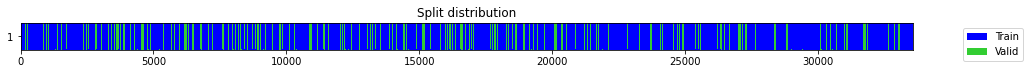

splits:([29564, 2979, 15031, 28403, 18712, 2393, 21632, 20906, 16421, 17183, 18999, 30706, 27651, 19312, 15863, 5399, 31046, 28292, 24227, 10671, 7918, 646, 22139, 21967, 8442, 11303, 9565, 15340, 4635, 22275, 6939, 23229, 23455, 24000, 19638, 14135, 13254, 9795, 6, 13622, 11266, 3040, 8676, 25819, 30544, 9007, 14816, 23871, 9060, 3373, 4847, 19957, 32181, 17375, 27558, 6428, 14346, 392, 7110, 26591, 10446, 18690, 22183, 25870, 15902, 27614, 2906, 5980, 27038, 31903, 7389, 9917, 22448, 10869, 14855, 22807, 31416, 3134, 20698, 17817, 20450, 32166, 22366, 22384, 4990, 24381, 13470, 17770, 10934, 33443, 32113, 30209, 27267, 131, 8881, 31667, 33243, 22062, 10875, 17834, 33275, 19685, 16502, 11697, 11004, 32363, 13368, 17468, 3482, 27176, 14546, 10879, 30625, 5500, 8740, 15622, 27710, 21314, 1186, 24156, 13608, 4128, 4143, 17166, 13556, 13507, 20870, 27092, 19003, 29785, 13749, 24856, 33202, 2902, 31772, 3959, 12835, 9303, 24389, 15123, 31329, 31796, 27997, 30448, 29713, 28441, 27585, 13396

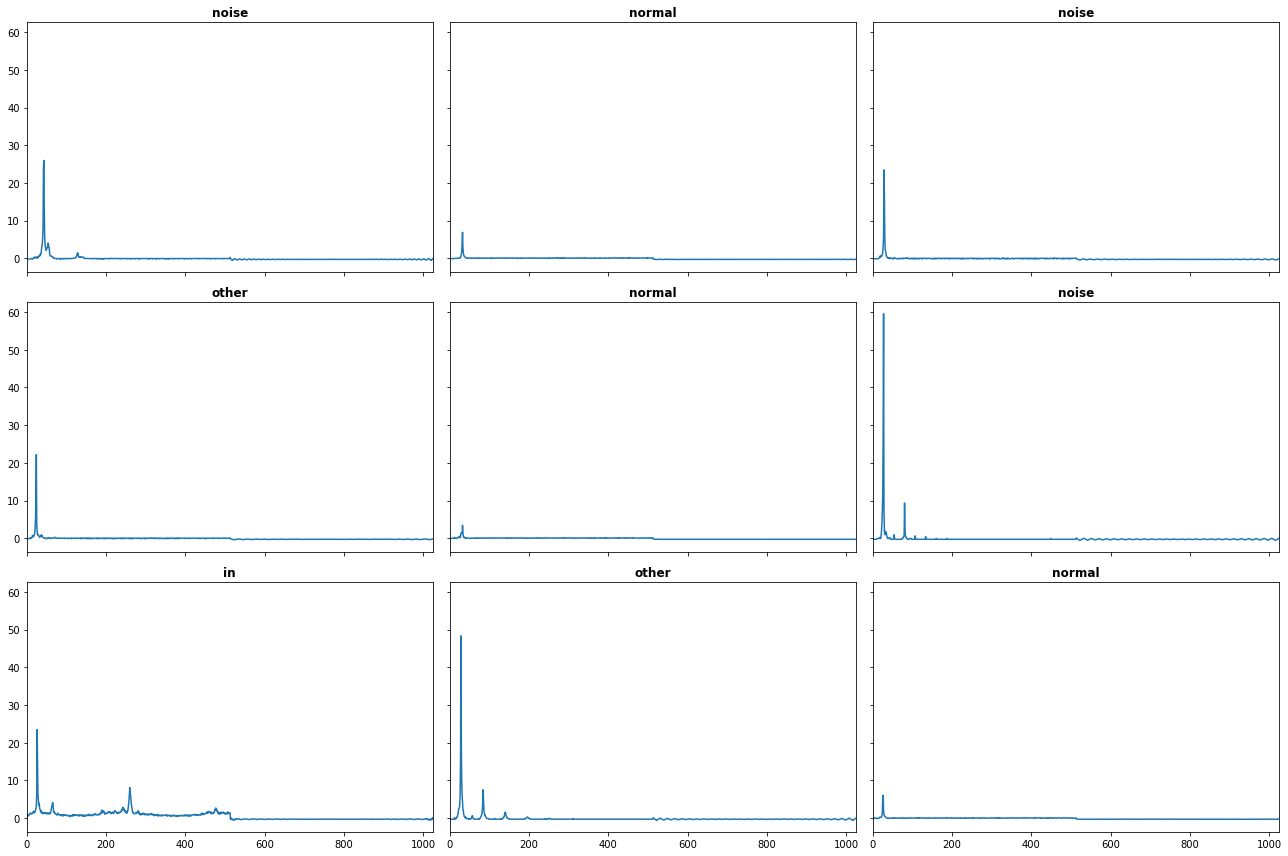

epoch,train_loss,valid_loss,accuracy,time
0,0.730277,1.448726,0.424256,00:28
1,0.675554,0.683105,0.741220,00:28
2,0.666426,0.648782,0.751637,00:28
3,0.632706,0.857685,0.690476,00:28
4,0.611250,1.050679,0.697024,00:28
5,0.603426,0.684628,0.727530,00:28
6,0.541090,0.627610,0.768304,00:28
7,0.516832,0.561165,0.798512,00:28
8,0.492725,0.514993,0.811905,00:28
9,0.487921,0.490458,0.822768,00:28


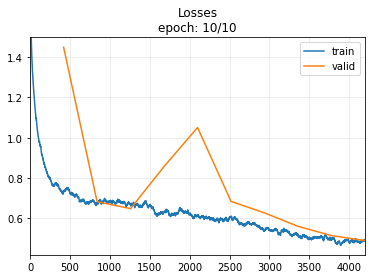

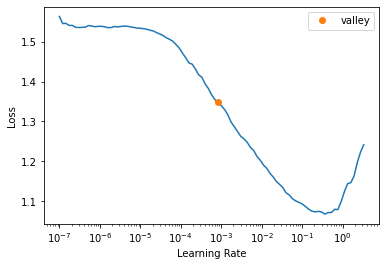

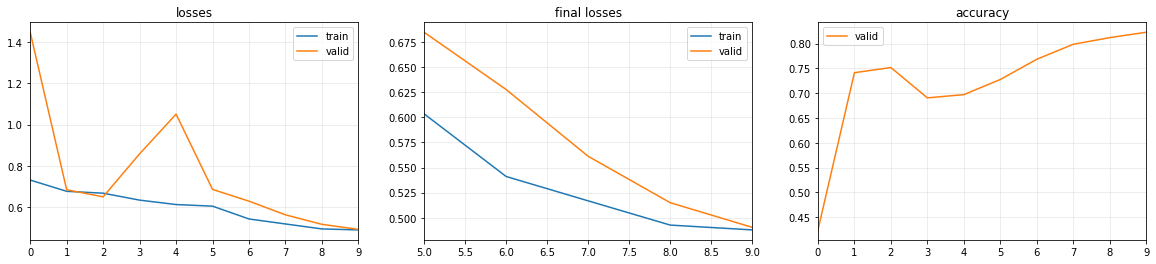

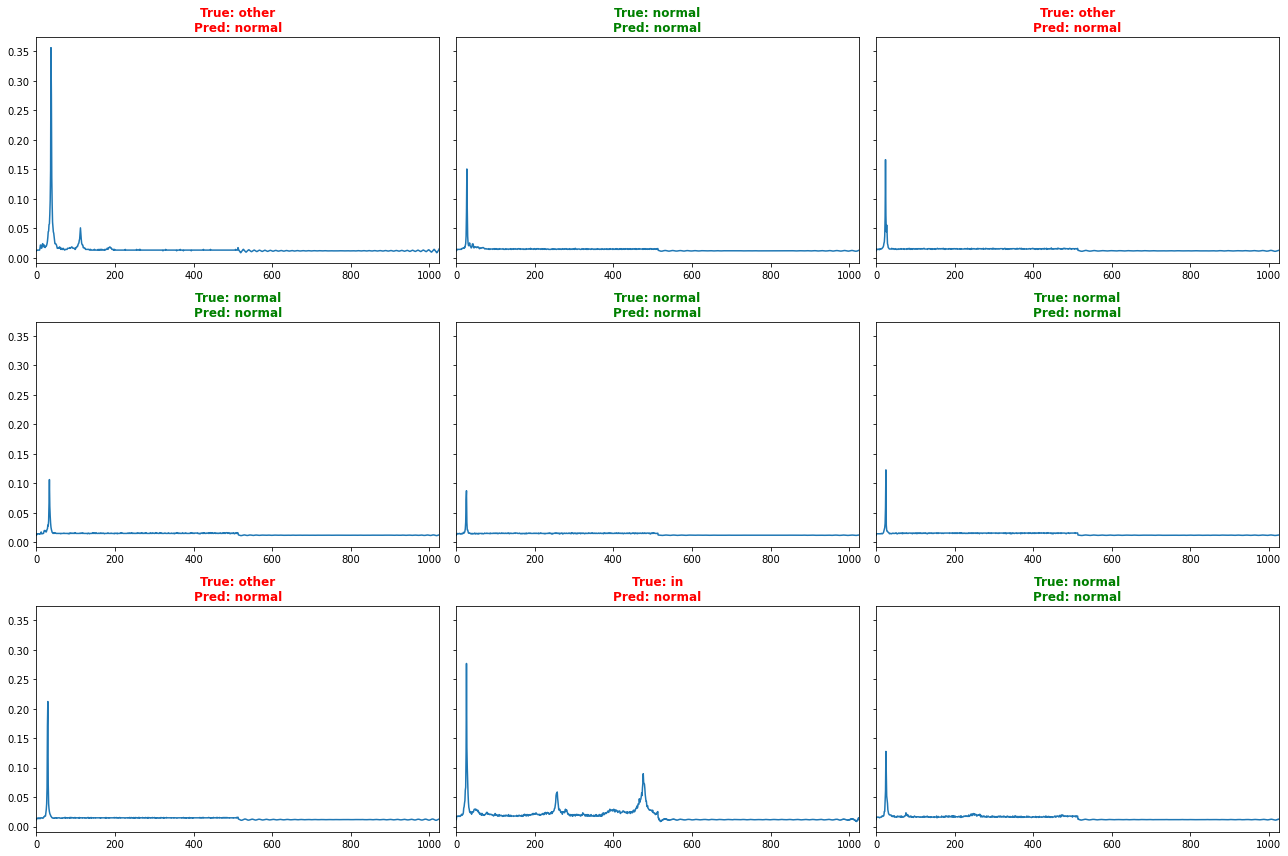

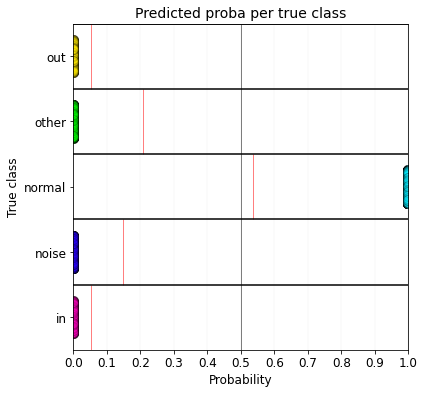

              precision    recall  f1-score   support

          in       0.00      0.00      0.00       360
       noise       0.00      0.00      0.00      1000
      normal       0.54      1.00      0.70      3600
       other       0.00      0.00      0.00      1400
         out       0.00      0.00      0.00       360

    accuracy                           0.54      6720
   macro avg       0.11      0.20      0.14      6720
weighted avg       0.29      0.54      0.37      6720



['normal' 'other' 'normal' 'normal' 'other' 'normal' 'other' 'normal'
 'normal' 'normal']


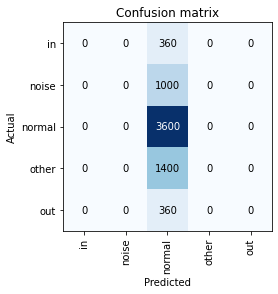

In [39]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성

#
X, y = norm_X, concat_y
model_name = 'InceptionTimePlus'
method_num = '3'
#
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

## 방법4
- before, after concat한 데이터 전체를 RobustScaling

In [40]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat_X = concat.drop('leaktype', axis=1)
concat_y = np.array(concat[['leaktype']].leaktype) # y 완료
display(concat_X, concat_y)

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,503,504,505,506,507,508,509,510,511,512
0,0,2,2,0,2,0,2,2,2,2,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,0,0,0,3,0,3,0,0,0,0,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,0,4,4,4,4,5,4,4,5,5,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,0,6,5,5,6,5,6,6,5,5,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,0,3,0,0,3,0,0,3,3,3,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,0,3,3,3,2,3,3,3,3,7,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,0,0,0,0,0,0,0,0,0,0,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,0,8,7,7,5,8,8,8,8,7,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


array(['out', 'out', 'out', ..., 'noise', 'noise', 'noise'], dtype=object)

In [41]:
X = np.array(concat_X)
X.shape

(33600, 1026)

In [42]:
X_1d = X.reshape(1, -1)
X_1d.shape

(1, 34473600)

In [43]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler = scaler.fit(X_1d.T)
scaled_X = scaler.transform(X_1d.T).T
#X = to3d(scaled_X) # X 완료
X = scaled_X.reshape((33600, 1026))
X = to3d(X)
X.shape

(33600, 1, 1026)

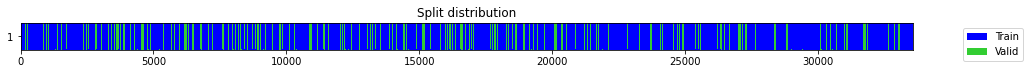

splits:([29564, 2979, 15031, 28403, 18712, 2393, 21632, 20906, 16421, 17183, 18999, 30706, 27651, 19312, 15863, 5399, 31046, 28292, 24227, 10671, 7918, 646, 22139, 21967, 8442, 11303, 9565, 15340, 4635, 22275, 6939, 23229, 23455, 24000, 19638, 14135, 13254, 9795, 6, 13622, 11266, 3040, 8676, 25819, 30544, 9007, 14816, 23871, 9060, 3373, 4847, 19957, 32181, 17375, 27558, 6428, 14346, 392, 7110, 26591, 10446, 18690, 22183, 25870, 15902, 27614, 2906, 5980, 27038, 31903, 7389, 9917, 22448, 10869, 14855, 22807, 31416, 3134, 20698, 17817, 20450, 32166, 22366, 22384, 4990, 24381, 13470, 17770, 10934, 33443, 32113, 30209, 27267, 131, 8881, 31667, 33243, 22062, 10875, 17834, 33275, 19685, 16502, 11697, 11004, 32363, 13368, 17468, 3482, 27176, 14546, 10879, 30625, 5500, 8740, 15622, 27710, 21314, 1186, 24156, 13608, 4128, 4143, 17166, 13556, 13507, 20870, 27092, 19003, 29785, 13749, 24856, 33202, 2902, 31772, 3959, 12835, 9303, 24389, 15123, 31329, 31796, 27997, 30448, 29713, 28441, 27585, 13396

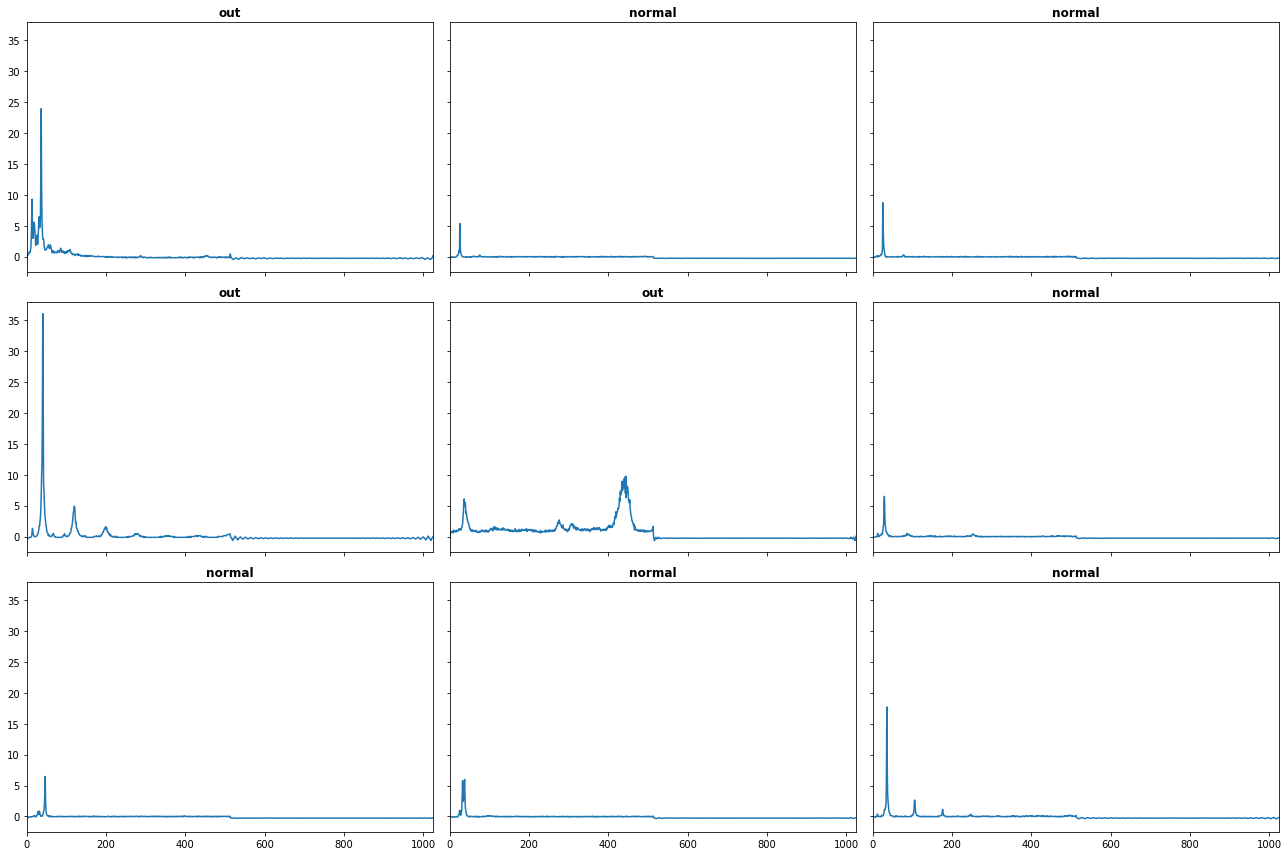

epoch,train_loss,valid_loss,accuracy,time
0,0.751339,2.479609,0.230655,00:28
1,0.699019,3.481148,0.324851,00:28
2,0.663429,0.883593,0.715179,00:28
3,0.626722,1.875133,0.614732,00:27
4,0.614964,0.656660,0.748810,00:28
5,0.579604,0.573297,0.779613,00:28
6,0.550332,0.569521,0.787798,00:28
7,0.530289,0.537077,0.805655,00:27
8,0.512850,0.512246,0.808185,00:28
9,0.513508,0.498260,0.817560,00:27


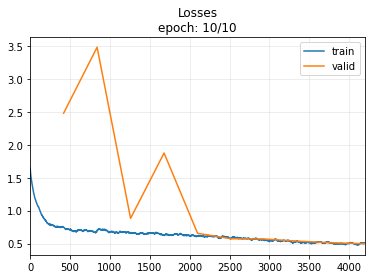

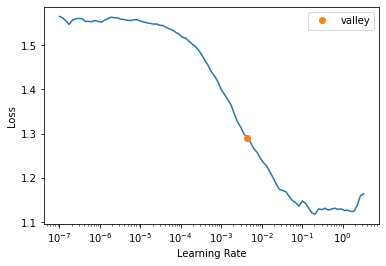

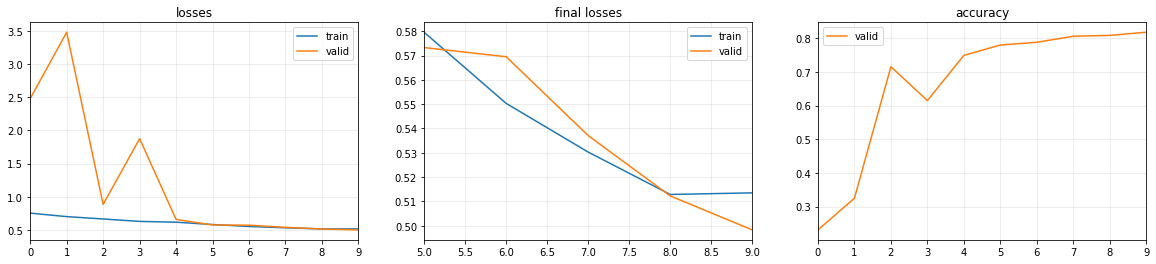

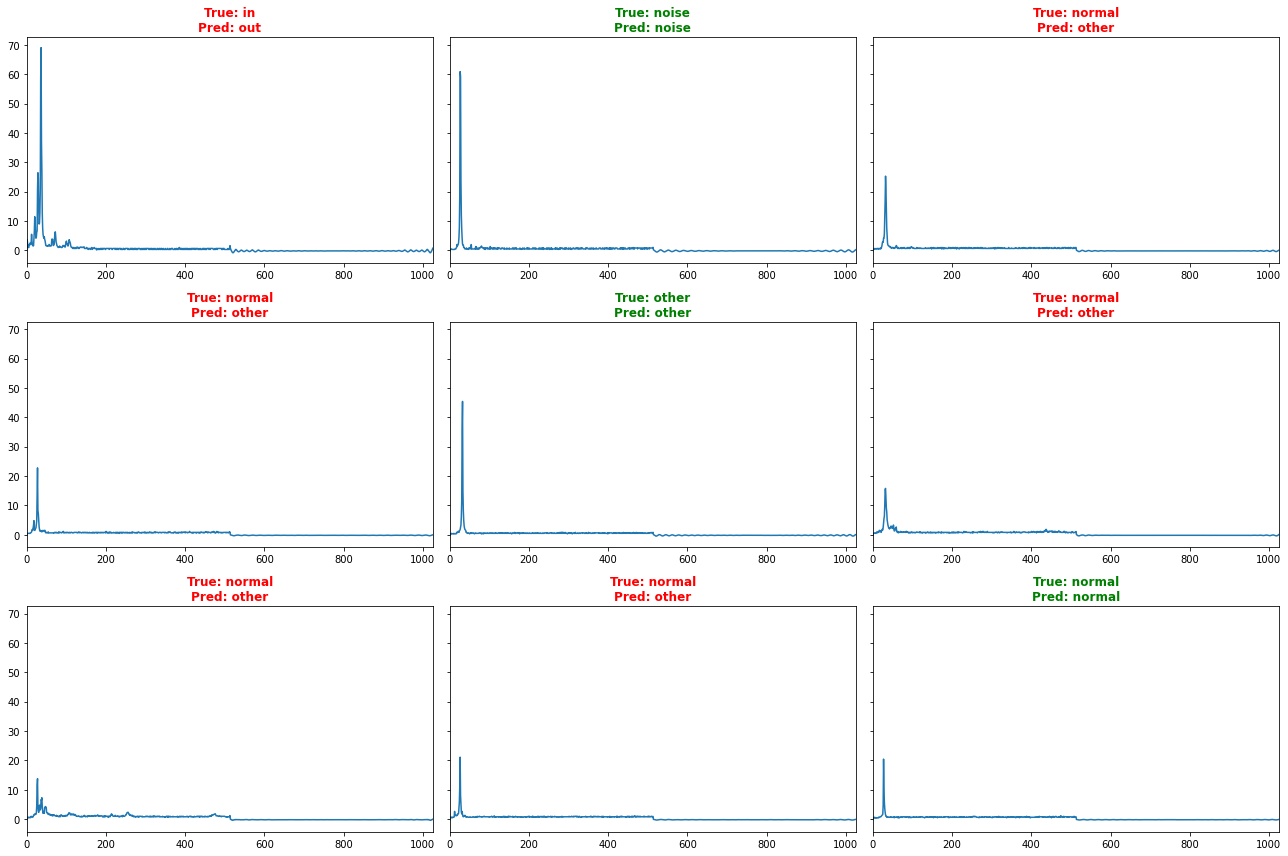

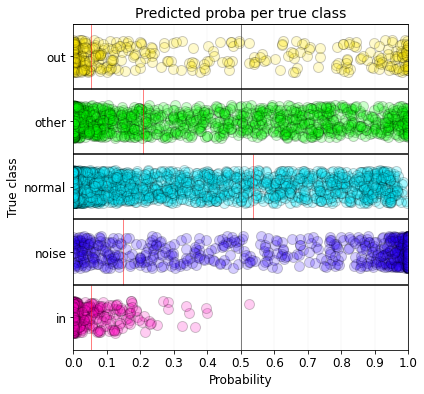

              precision    recall  f1-score   support

          in       0.05      0.01      0.01       360
       noise       0.43      0.78      0.56      1000
      normal       1.00      0.17      0.28      3600
       other       0.14      0.35      0.20      1400
         out       0.19      0.36      0.25       360

    accuracy                           0.30      6720
   macro avg       0.36      0.33      0.26      6720
weighted avg       0.64      0.30      0.29      6720



['normal' 'other' 'normal' 'normal' 'other' 'normal' 'other' 'normal'
 'normal' 'normal']


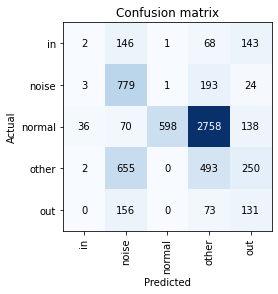

In [44]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성
X, y = X, concat_y
model_name = 'InceptionTimePlus'
method_num = '4'
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(10, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])

## 방법5
- Normalizer 사용

In [45]:
import pandas as pd
concat = pd.read_csv('/content/drive/MyDrive/AIBIZ/Data/v23/leaktype_concat_ifft.csv', index_col=0, header=0)
concat_X = concat.drop('leaktype', axis=1)
concat_y = np.array(concat[['leaktype']].leaktype) # y 완료
display(concat_X, concat_y)

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,503,504,505,506,507,508,509,510,511,512
0,0,2,2,0,2,0,2,2,2,2,...,-3.379739,-2.909041,-2.145088,-1.338498,-0.565195,0.273550,1.040136,1.884236,2.707740,3.561624
1,0,0,0,3,0,3,0,0,0,0,...,-0.034648,-1.199653,-2.970326,-6.165960,-5.509427,-2.600036,-1.066644,0.260431,1.710846,4.455612
2,0,4,4,4,4,5,4,4,5,5,...,0.355560,-0.669577,-1.770634,-2.751953,-3.218105,-2.929355,-1.711270,0.057115,2.326266,4.314191
3,0,6,5,5,6,5,6,6,5,5,...,1.008454,-1.460584,1.217212,-2.430595,1.891802,-3.844817,3.995386,-5.354133,7.132651,-6.220146
4,0,3,0,0,3,0,0,3,3,3,...,-4.642712,-4.370681,-3.315900,-2.125377,-0.992489,-0.100297,0.880931,1.975863,3.275575,4.547614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33595,0,5,6,6,23,15,7,10,15,16,...,-0.301020,-1.247795,-2.643613,-3.285370,-3.351347,-2.413019,-0.802755,0.845496,3.015975,4.364622
33596,0,3,3,3,2,3,3,3,3,7,...,-2.605963,-2.885061,-2.385597,-1.697930,-0.910141,-0.248143,0.479128,1.163582,2.020523,2.904051
33597,0,0,0,0,0,0,0,0,0,0,...,-3.930189,-3.969320,-2.939710,-2.113923,-1.072028,-0.223927,0.694871,1.665603,2.796113,3.850286
33598,0,8,7,7,5,8,8,8,8,7,...,4.456915,-4.982636,5.620159,-6.497012,7.257637,-8.516330,9.713875,-11.676628,14.031722,-18.730260


array(['out', 'out', 'out', ..., 'noise', 'noise', 'noise'], dtype=object)

In [47]:
concat_X = np.array(concat_X)
print(concat_X.shape)
X = concat_X.reshape(1, -1)
print(X.shape)

(33600, 1026)
(1, 34473600)


In [48]:
X

array([[0.        , 2.        , 2.        , ..., 1.68290156, 2.45449671,
        3.14538889]])

In [49]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
transformer = transformer.fit(X.T)
transformed_X = transformer.transform(X.T).T
#X = to3d(transformed_X) # X 완료

In [51]:
X = transformed_X.reshape((33600, 1026))
X

array([[ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ..., -1.,  1., -1.],
       [ 0.,  0.,  1., ...,  1.,  1.,  1.]])

In [52]:
X = to3d(X)

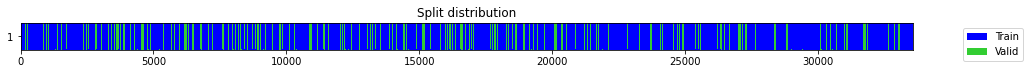

splits:([29564, 2979, 15031, 28403, 18712, 2393, 21632, 20906, 16421, 17183, 18999, 30706, 27651, 19312, 15863, 5399, 31046, 28292, 24227, 10671, 7918, 646, 22139, 21967, 8442, 11303, 9565, 15340, 4635, 22275, 6939, 23229, 23455, 24000, 19638, 14135, 13254, 9795, 6, 13622, 11266, 3040, 8676, 25819, 30544, 9007, 14816, 23871, 9060, 3373, 4847, 19957, 32181, 17375, 27558, 6428, 14346, 392, 7110, 26591, 10446, 18690, 22183, 25870, 15902, 27614, 2906, 5980, 27038, 31903, 7389, 9917, 22448, 10869, 14855, 22807, 31416, 3134, 20698, 17817, 20450, 32166, 22366, 22384, 4990, 24381, 13470, 17770, 10934, 33443, 32113, 30209, 27267, 131, 8881, 31667, 33243, 22062, 10875, 17834, 33275, 19685, 16502, 11697, 11004, 32363, 13368, 17468, 3482, 27176, 14546, 10879, 30625, 5500, 8740, 15622, 27710, 21314, 1186, 24156, 13608, 4128, 4143, 17166, 13556, 13507, 20870, 27092, 19003, 29785, 13749, 24856, 33202, 2902, 31772, 3959, 12835, 9303, 24389, 15123, 31329, 31796, 27997, 30448, 29713, 28441, 27585, 13396

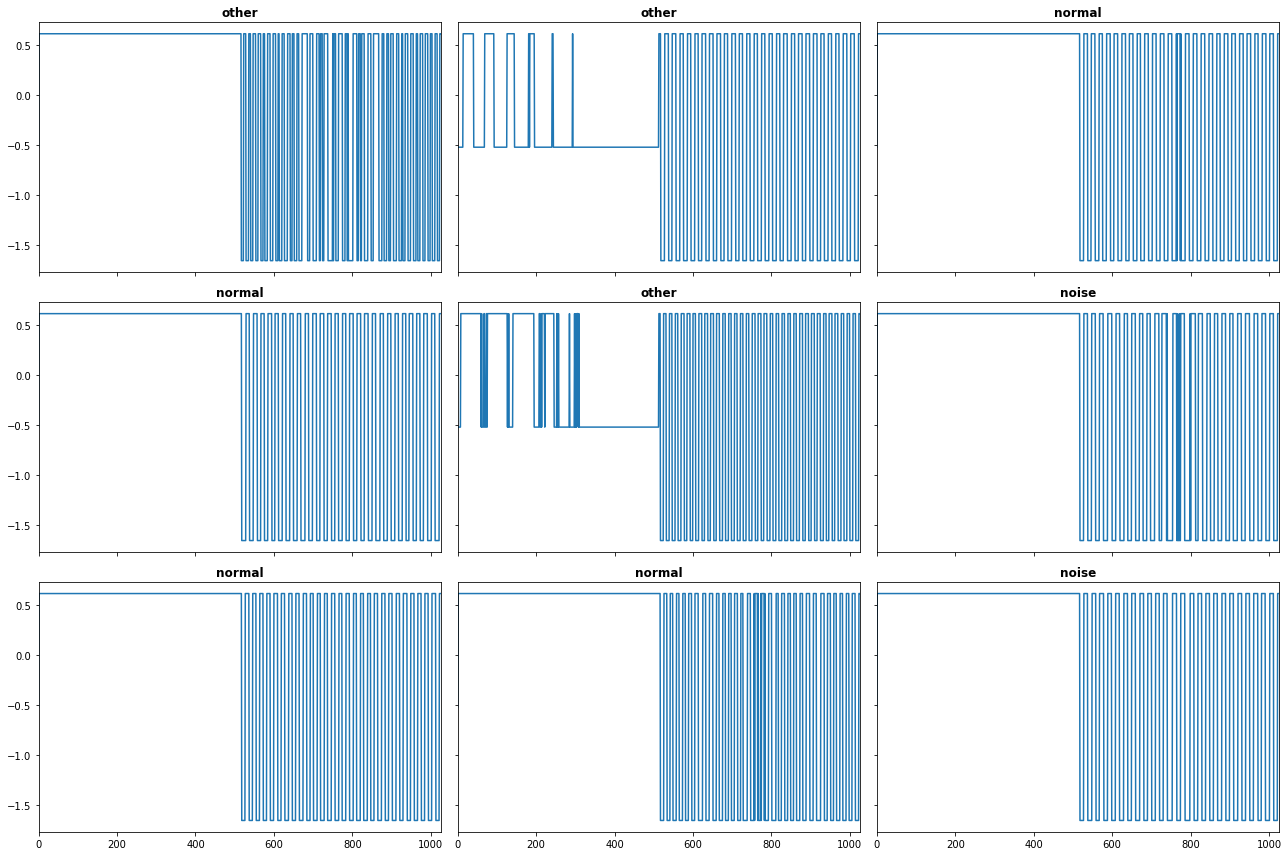

epoch,train_loss,valid_loss,accuracy,time
0,1.072404,1.134884,0.572619,00:28
1,1.030352,1.485454,0.365327,00:28
2,1.004031,1.162997,0.607887,00:28
3,0.974175,0.976903,0.638244,00:28
4,0.948574,0.948150,0.658185,00:28


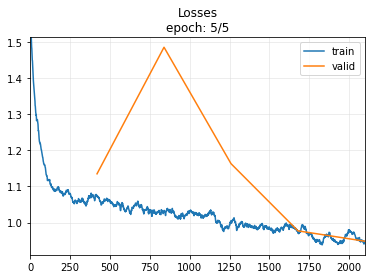

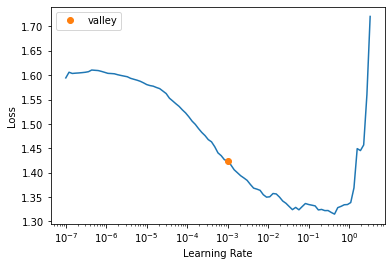

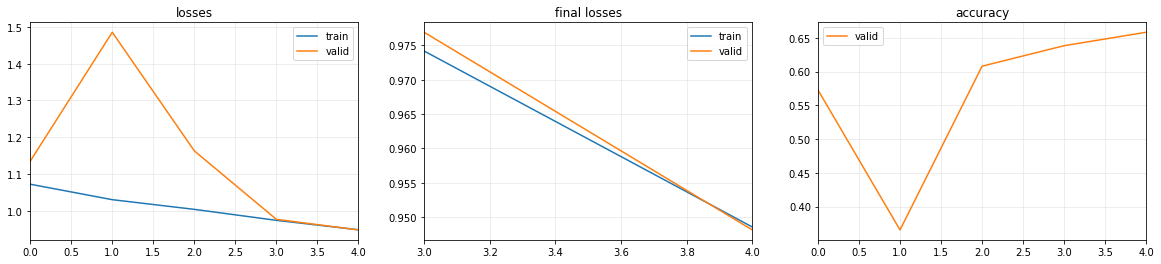

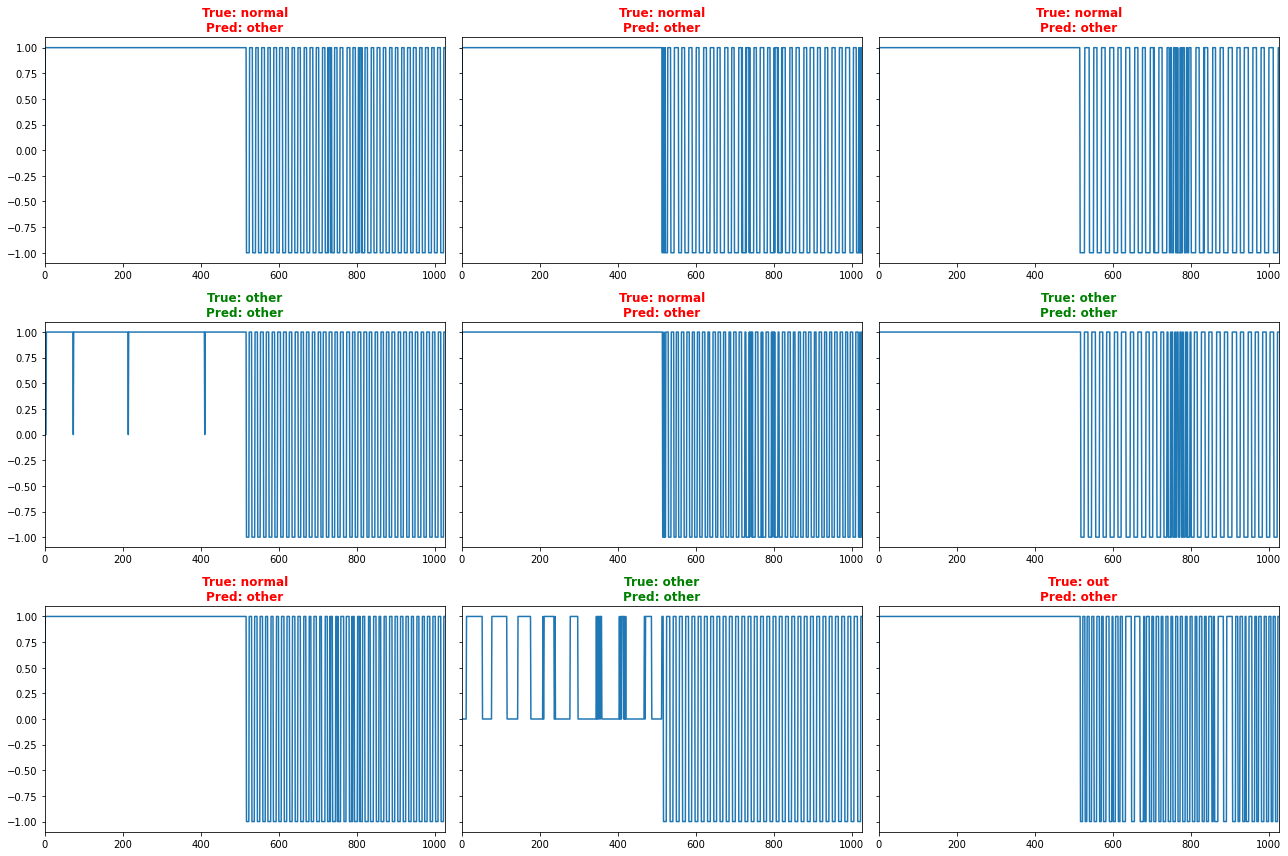

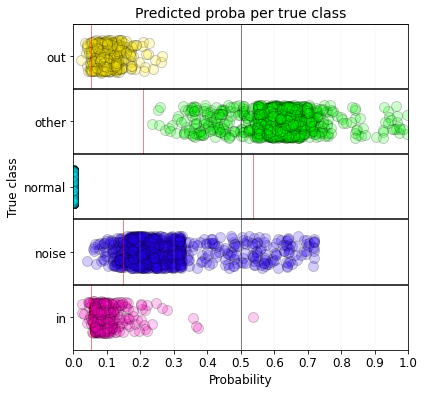

              precision    recall  f1-score   support

          in       1.00      0.00      0.01       360
       noise       0.51      0.13      0.20      1000
      normal       0.00      0.00      0.00      3600
       other       0.20      0.94      0.33      1400
         out       0.00      0.00      0.00       360

    accuracy                           0.22      6720
   macro avg       0.34      0.21      0.11      6720
weighted avg       0.17      0.22      0.10      6720



['normal' 'normal' 'normal' 'noise' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal']


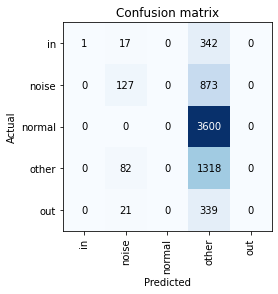

In [53]:
# 전처리한 데이터 X, y 준비 후 #
########### TEMPLATE ############
# splits 생성
X, y = X, concat_y
model_name = 'InceptionTimePlus'
method_num = '5'
splits = get_splits(y, valid_size=0.2, stratify=True, random_state=42, shuffle=True)
print(f'splits:{splits}')

# prepare dataloaders
tfms = [None, TSClassification()] # TSClassification == Categorize
batch_tfms = TSStandardize()
dls = get_ts_dls(X, y, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=[64, 128])
print(f'dls.dataset:\n{dls.dataset}')
dls.show_batch(sharey=True) # 데이터 그래프로 보여줌
plt.show()

# build learner
model = build_ts_model(InceptionTimePlus, dls=dls) # model
learn = Learner(dls, model, metrics=accuracy)

# learning rate curve
learn.lr_find()

# train
learn = ts_learner(dls, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(5, lr_max=1e-3)

# 모델 저장
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# visualize data
learn.show_results(sharey=True)
learn.show_probas()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.most_confused(min_val=3)
interp.print_classification_report()

# create predictions
PATH = Path(f'./models/{model_name}_{method_num}.pkl')
learn_gpu = load_learner(PATH, cpu=False)
probas, _, preds = learn_gpu.get_X_preds(X[splits[0]])
print(preds[-10:])